In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import boto3

# Connection to the S3 service
s3 = boto3.client('s3',
                  aws_access_key_id='USEastKAPLFDPG9BLUEM',
                  aws_secret_access_key='FYsNJIDT7evvMeGS2PphtxZ/w32BULK/1WgB3I+')

# Bucket name and file key (path)
bucket_name = 'sparkify-lab-3-kalyan'
file_key = 's3://sparkify-lab-3-kalyan/Global.csv'

# Download the CSV file from S3
s3.download_file(bucket_name, file_key, 'Global.csv')

In [8]:
# Now you can read the CSV file into your Python project using Pandas or other libraries
df = pd.read_csv('Global.csv', encoding='ISO-8859-1')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

### Data Pre-processing & Analysis

#### Data Cleaning

In [5]:
# Fill missing values
df['category'].fillna(df['category'].mode()[0], inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['channel_type'].fillna(df['channel_type'].mode()[0], inplace=True)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)


In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                5
created_date 

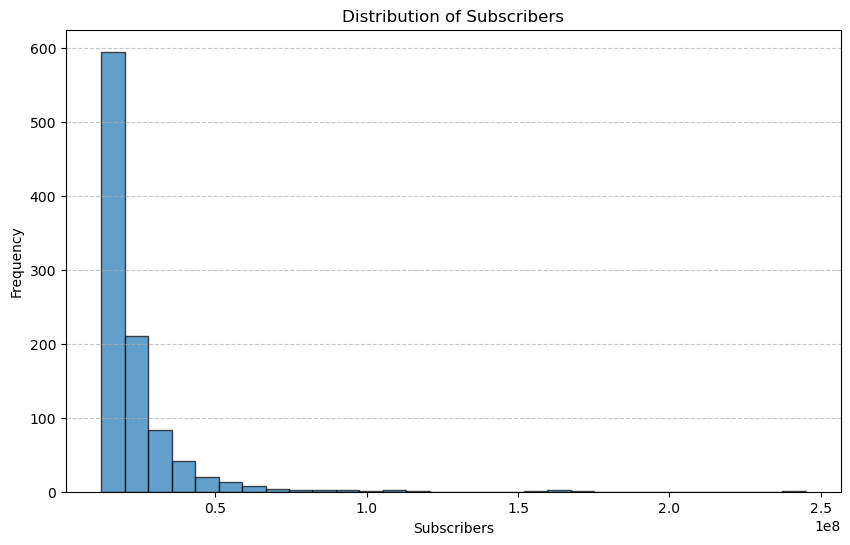

In [7]:
# Subscribers distribution
plt.figure(figsize=(10, 6))
df['subscribers'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

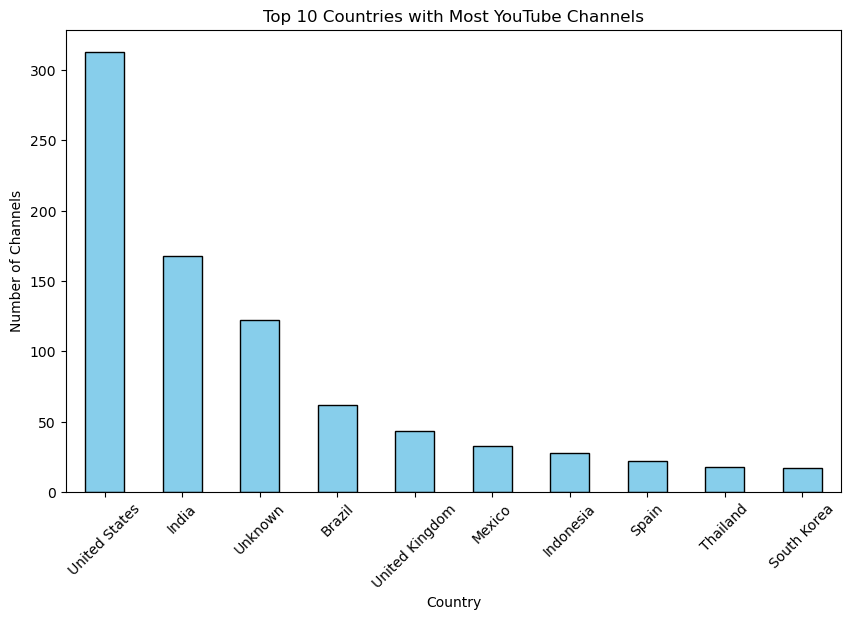

In [8]:
# Top 10 countries with the most YouTube channels
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with Most YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45)
plt.show()

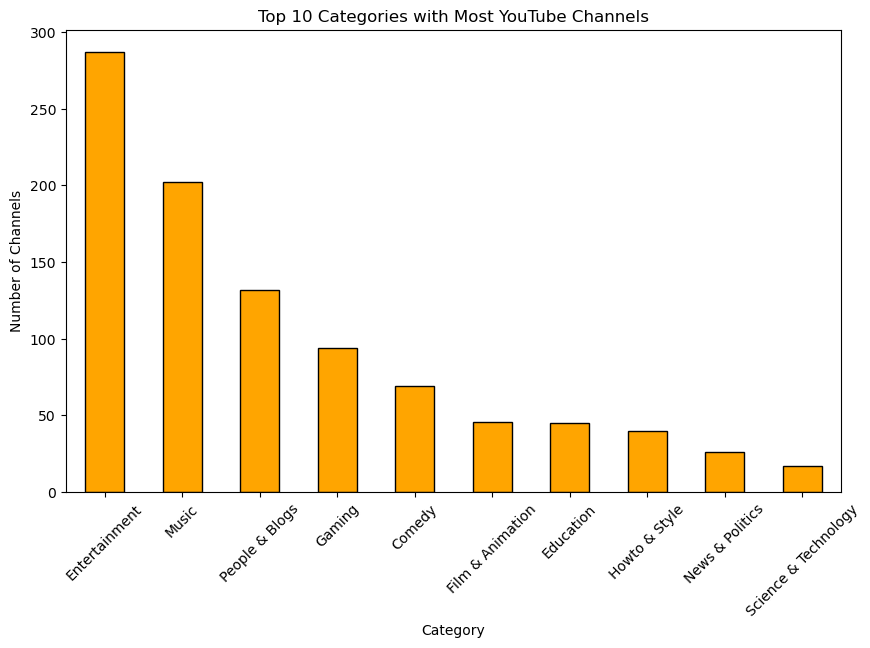

In [9]:
# Top 10 categories with the most channels
top_categories = df['category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Categories with Most YouTube Channels')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45)
plt.show()

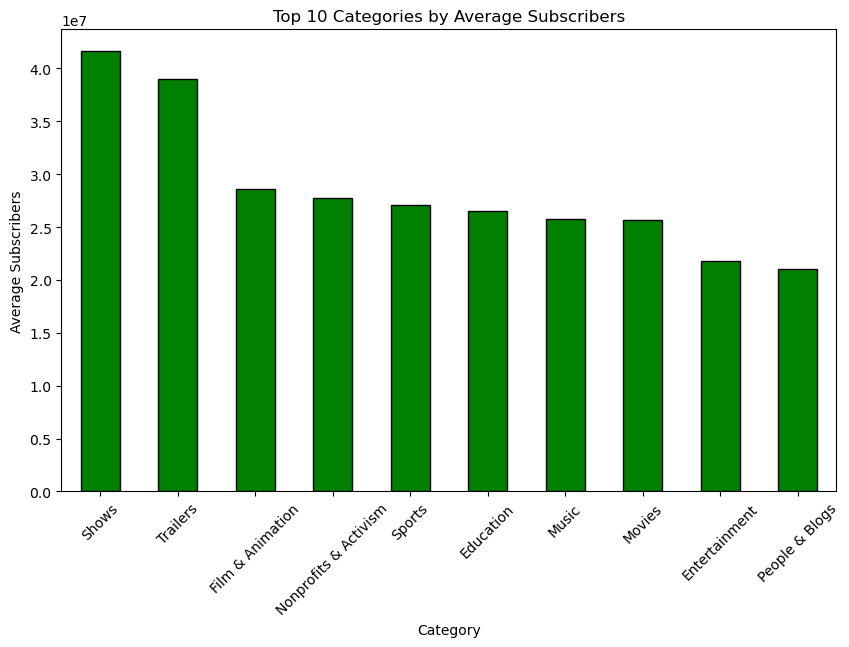

In [10]:
# Average subscribers per category
avg_subscribers_per_category = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_subscribers_per_category.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Categories by Average Subscribers')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=45)
plt.show()

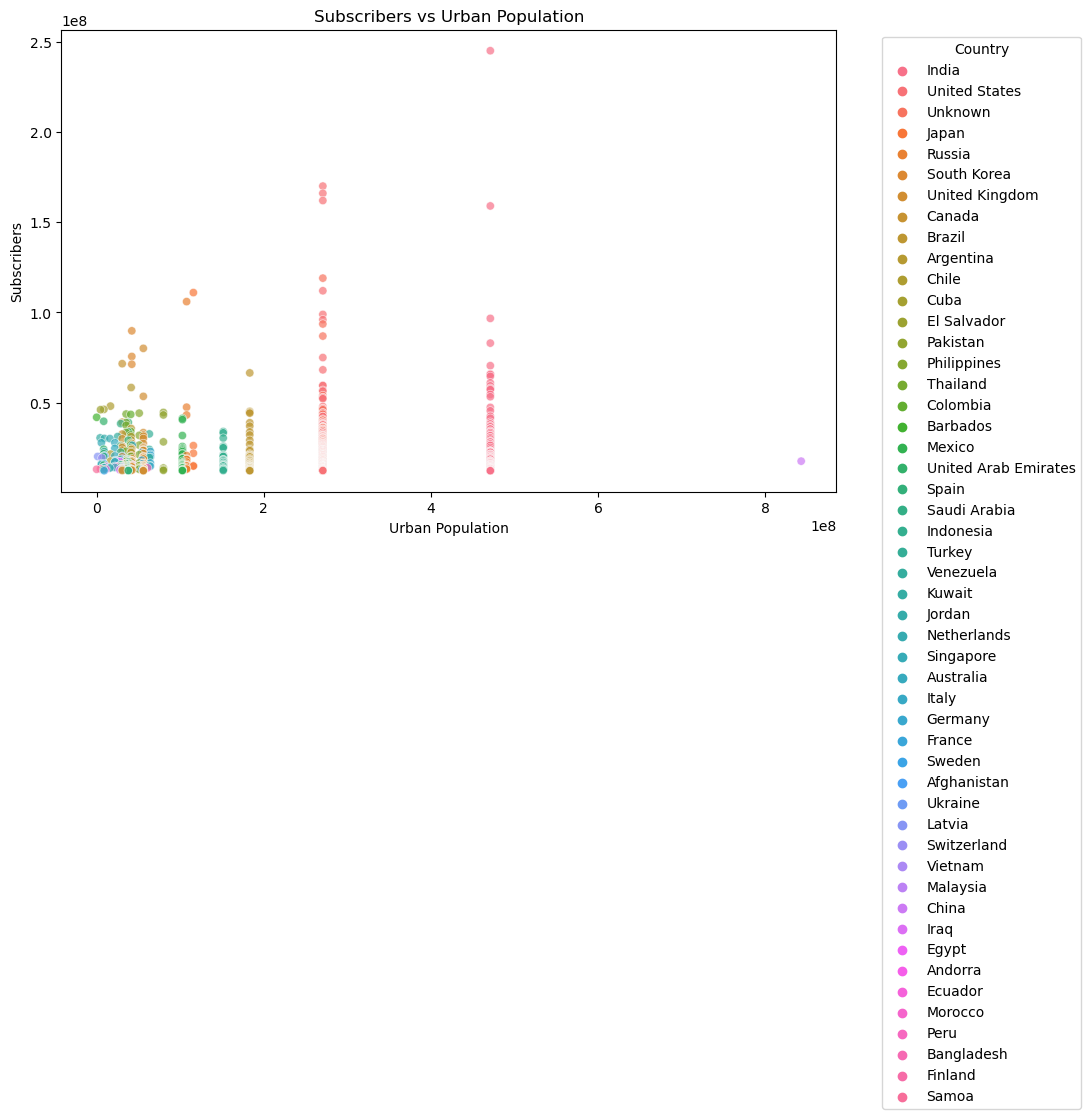

In [11]:
# Relationship between Urban Population and Subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Urban_population', y='subscribers', hue='Country', alpha=0.7)
plt.title('Subscribers vs Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Subscribers')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
#Calculate the total number of subscribers by country and sort them in descending order
country_subs_total = df.groupby("Country")["subscribers"].sum().sort_values(ascending = False)
country_subs_total

Country
United States           7329500000
India                   4310600000
Unknown                 2922200000
Brazil                  1221800000
United Kingdom           917400000
Mexico                   626900000
Indonesia                534100000
South Korea              481700000
Russia                   407200000
Thailand                 386500000
Spain                    385100000
Canada                   363900000
Argentina                328500000
Colombia                 264500000
Philippines              240100000
Japan                    189100000
Saudi Arabia             179100000
Australia                172000000
Pakistan                 155400000
United Arab Emirates     148200000
Ukraine                  125600000
Germany                  116400000
Turkey                    91600000
Chile                     87200000
France                    83900000
Jordan                    67000000
Sweden                    63000000
Singapore                 59700000
Netherlands 

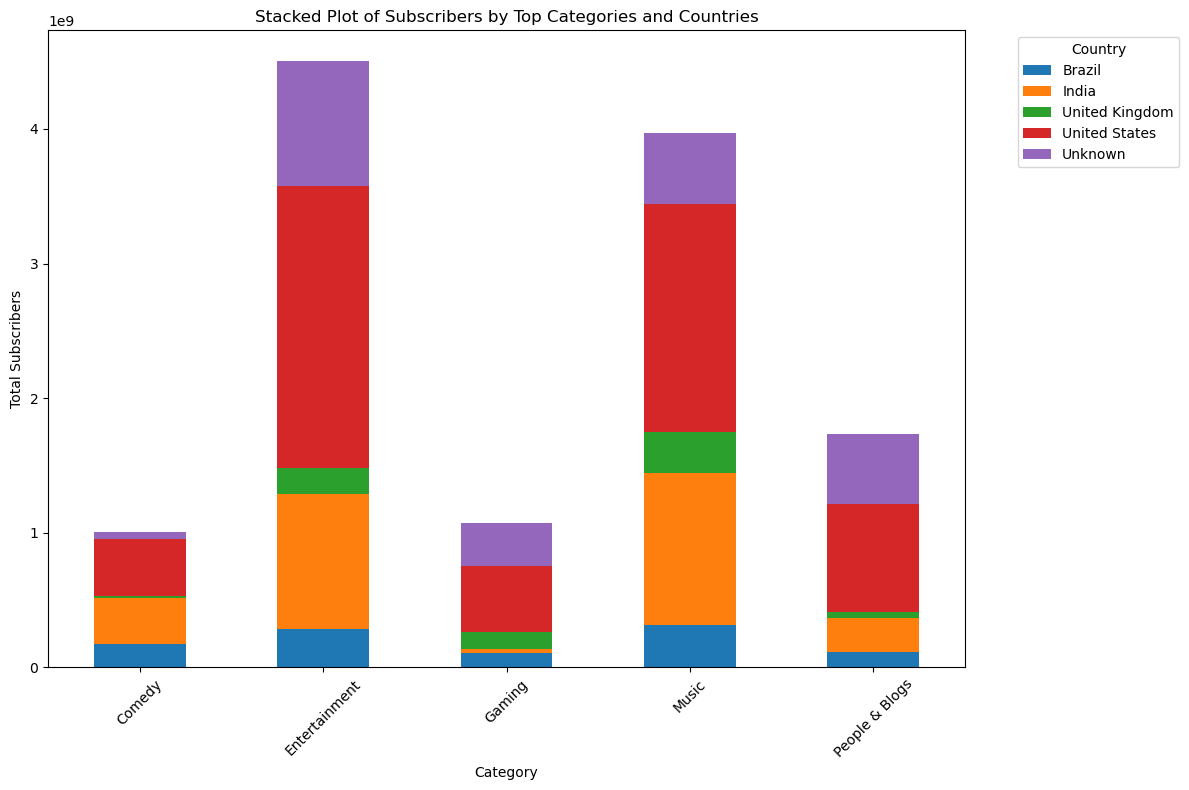

In [13]:
import matplotlib.pyplot as plt

# First, identify the top 5 categories and top 5 countries by subscribers
top_categories = df.groupby('category')['subscribers'].sum().nlargest(5).index
top_countries = df.groupby('Country')['subscribers'].sum().nlargest(5).index

# Filter the data to include only top categories and countries
filtered_data = df[df['category'].isin(top_categories) & df['Country'].isin(top_countries)]

# Group and pivot the data to get the sum of subscribers for each category-country combination
grouped_data = filtered_data.groupby(['category', 'Country'])['subscribers'].sum().unstack().fillna(0)

# Generate a stacked plot
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
plt.title('Stacked Plot of Subscribers by Top Categories and Countries')
plt.ylabel('Total Subscribers')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
# Sorting the data by 'highest_monthly_earnings' to find the top channels
top_earning_channels = df.sort_values(by='highest_monthly_earnings', ascending=False).head(10)

# Display the top earning channels
top_earning_channels[['Youtuber', 'highest_monthly_earnings', 'category', 'Country']]


,Youtuber,highest_monthly_earnings,category,Country
495,ýýýýýýýýý KIMPRO,13600000.0,Entertainment,South Korea
417,DaFuq!?Boom!,9200000.0,Film & Animation,United States
0,T-Series,9000000.0,Music,India
302,KL BRO Biju Rithvik,8100000.0,Entertainment,Unknown
3,Cocomelon - Nursery Rhymes,7900000.0,Education,United States
4,SET India,7300000.0,Shows,India
21,Zee TV,6800000.0,Entertainment,India
139,StarPlus,6700000.0,Entertainment,India
15,Sony SAB,6600000.0,Shows,India
83,GR6 EXPLODE,6500000.0,Music,Brazil


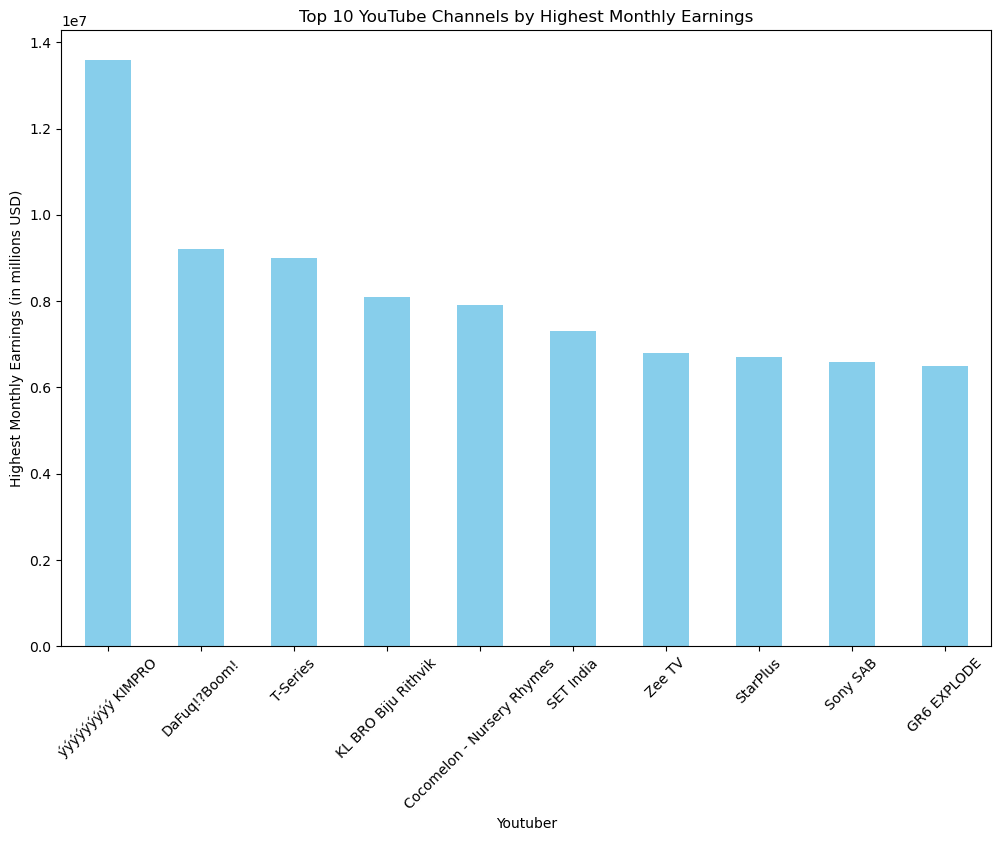

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
top_earning_channels.plot(kind='bar', x='Youtuber', y='highest_monthly_earnings', ax=ax, legend=False, color='skyblue')
plt.title('Top 10 YouTube Channels by Highest Monthly Earnings')
plt.ylabel('Highest Monthly Earnings (in millions USD)')
plt.xlabel('Youtuber')
plt.xticks(rotation=45)
plt.show()


### Prediction

In [16]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,200000.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Entertainment,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


#### Feature Engineering

In [17]:
df['Avg_Monthly'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

In [18]:
columns_to_convert = ["video_views_rank", "country_rank", "subscribers", 
                      "video views", "uploads", "video_views_for_the_last_30_days"]

# Convert columns to numeric, handle errors, and remove negative signs
df[columns_to_convert] = (
    df[columns_to_convert]
    .apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors to NaN
    .fillna(0)                             # Fill NaN with 0
    .abs()                                 # Take the absolute value
    .astype(int)                           # Convert to integer
)

In [19]:
from sklearn.preprocessing import LabelEncoder

#Apply label encoding to string columns
columns_to_encode = ["Youtuber", "channel_type",'category', 'Country' ]

label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


In [20]:
features = [ "Youtuber", "channel_type", "video_views_rank", "country_rank",
    "subscribers", "video views", "uploads", "video_views_for_the_last_30_days", "category", "Country"]

In [21]:
X = df[features]
y = df["Avg_Monthly"]

In [22]:
# Convert categorical features into numerical (One-Hot Encoding)
X = pd.get_dummies(X, columns=["category", "Country"], drop_first=True)

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Build a Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9269468680756947


 R-squared value of 0.9269 indicates that our model is performing very well and explains most of the variance in the target variable. 